# Some preprocessing for the sentences 
* need the file *train.csv*

In [0]:
# import necessary package
import numpy as np
import pandas as pd
import re       # regular expression to filter show patter/word out
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

## function to clean the word of any punctuation or special characters
* Can change any pattern here
* But need some regular expression knowledge [ref](https://docs.python.org/3/library/re.html)
* Or just follow what have typed and change some content in the function

In [0]:
def cleanPunc(sentence):
    #remove word in () include word connected by _or- but won't remove sentences
    cleaned = re.sub(r'\([A-Z|a-z]+\)',r'',sentence)
    #remove punctuation
    cleaned = re.sub(r'[?|!|\'|"|#|:|;|,|.|%|<|>|\(|\)|\^|\||/|\[|\]|&|*|+|=|@|`|~]',r'',cleaned)
    #remove space \n in the end of the sentences
    cleaned = cleaned.strip()
    #remove numbers and words right follow numbers like XXcm(or XX-cm, XX-) but XX cm won't be remove
    cleaned = re.sub(r'\d+\-\w*|\d+\w+|\d+',r'',cleaned)
    #remove - in -XXX or XXX- or -- but no XXX-XXX
    cleaned = re.sub(r'(?<=\w)-(?!\w)|(?<!\w)-(?=\w)|--|(?<!\w)-(?!\w)',r'',cleaned)
    #remove space and - in the start or end of the sentences again
    cleaned = cleaned.strip(' -')
    #incase there are two space 
    cleaned = cleaned.replace('  ',' ')   
    return cleaned

## Stemming and remove stop word

In [0]:
def removeStopWords(sentence):
    nltk.download('stopwords')   #need to download a stopwords set
    stop_words = set(stopwords.words('english'))
    re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
    return re_stop_words.sub("", sentence)

def stemming(sentence):
    stemmer = SnowballStemmer("english")
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

## Read in the data and execute the above functions

In [0]:
DATA = pd.read_csv('./train.csv')

''' Remove special punctuation and lower and stemming'''
DATA['Sentences'] = DATA['Sentences'].str.lower()       # change to lowercase
DATA['Sentences'] = DATA['Sentences'].apply(cleanPunc)
# I skip this step, since it need to download a stopword corpus, and also I don't think this is necessary
# DATA['Sentences'] = DATA['Sentences'].apply(removeStopWords)
DATA['Sentences'] = DATA['Sentences'].apply(stemming)

DATA.head()

,Id,Sentences,BACKGROUND,OBJECTIVES,METHODS,RESULTS,CONCLUSIONS,OTHERS
0,D00001,rapid popular of internet of thing and cloud c...,1,0,0,0,0,0
1,D00001,to ensur secur and reliabl data communic betwe...,0,1,0,0,0,0
2,D00001,this paper introduc a neuro-fuzzi base brain-i...,0,0,1,0,0,0
3,D00001,the propos tmm util node behavior trust and da...,0,0,1,0,0,0
4,D00001,in contrast to the exist fuzzi base tmms the n...,0,0,0,1,0,0


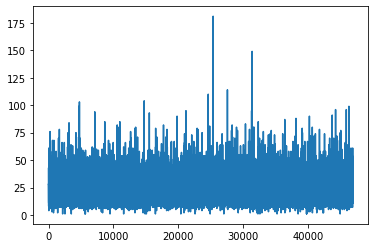

In [0]:
# investigate the sentences length after processing
if DATA.Sentences.notna().all():
    COUNT = np.zeros((DATA.shape[0]))
    for i in range(DATA.shape[0]):
        COUNT[i] = len(DATA.Sentences[i].split(' '))  

import matplotlib.pyplot as plt
plt.plot(COUNT)
plt.show()

## Here you can store the length of each sentence for later usage
* especially useful when try to train a RNN
```
DATA['LENGTH'] = COUNT
```

In [0]:
# most of the length==1 sentences belong to OTHERS
print(len(DATA[COUNT==1]))
DATA[COUNT==1][0:10]

31


,Id,Sentences,BACKGROUND,OBJECTIVES,METHODS,RESULTS,CONCLUSIONS,OTHERS
2172,D00323,hf-hash,0,0,1,0,0,0
2531,D00376,in,1,0,0,0,0,0
3499,D00515,stat,0,0,0,0,0,1
3500,D00515,mech,0,0,0,0,0,1
3501,D00515,theo,0,0,0,0,0,1
3502,D00515,exp,0,0,0,0,0,1
3503,D00515,doi,0,0,0,0,0,1
5606,D00821,no,0,0,0,0,0,1
5607,D00821,pp,0,0,0,0,0,1
5608,D00821,,0,0,0,0,0,1


In [0]:
print(len(DATA[COUNT==2]))
DATA[COUNT==2][0:10]

21


,Id,Sentences,BACKGROUND,OBJECTIVES,METHODS,RESULTS,CONCLUSIONS,OTHERS
761,D00113,intervent none,0,0,1,0,0,0
1406,D00210,bondarenko in,0,0,0,0,0,1
1409,D00210,littl kg,0,0,0,0,0,1
8316,D01226,dolc sumo,1,0,0,0,0,0
8319,D01226,dbpedia wikidata,1,0,0,0,0,0
13312,D01976,dog type,0,0,1,1,0,0
14558,D02167,cp decomposit,0,0,1,0,0,0
20855,D03100,s approach,0,0,0,0,0,1
29207,D04363,we conclud,0,0,0,0,1,0
31060,D04637,veri small,0,0,0,0,0,1


## Tokenize

In [0]:
from nltk.tokenize import word_tokenize

In [0]:
nltk.download('punkt') # for tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
# Apply word_tokenize to each sentences of the row
DATA['TOKEN'] = DATA.apply(lambda row: word_tokenize(row['Sentences']), axis=1)  # axis=1 means this iterator execute in the row-wise direction

In [0]:
# print out some result
DATA.head()

,Id,Sentences,BACKGROUND,OBJECTIVES,METHODS,RESULTS,CONCLUSIONS,OTHERS,TOKEN
0,D00001,rapid popular of internet of thing and cloud c...,1,0,0,0,0,0,"[rapid, popular, of, internet, of, thing, and,..."
1,D00001,to ensur secur and reliabl data communic betwe...,0,1,0,0,0,0,"[to, ensur, secur, and, reliabl, data, communi..."
2,D00001,this paper introduc a neuro-fuzzi base brain-i...,0,0,1,0,0,0,"[this, paper, introduc, a, neuro-fuzzi, base, ..."
3,D00001,the propos tmm util node behavior trust and da...,0,0,1,0,0,0,"[the, propos, tmm, util, node, behavior, trust..."
4,D00001,in contrast to the exist fuzzi base tmms the n...,0,0,0,1,0,0,"[in, contrast, to, the, exist, fuzzi, base, tm..."


In [0]:
# some sentences even content nothing after preprocessing, and most of them are belong to OTHERS
DATA.loc[DATA['Sentences']=='',:]

,Id,Sentences,BACKGROUND,OBJECTIVES,METHODS,RESULTS,CONCLUSIONS,OTHERS,TOKEN
5608,D00821,,0,0,0,0,0,1,[]
5669,D00833,,0,0,0,0,0,1,[]
9470,D01397,,0,0,0,0,0,1,[]
11566,D01720,,1,0,0,0,0,0,[]
15059,D02241,,1,0,0,0,0,0,[]
16454,D02445,,1,0,0,0,0,0,[]
22562,D03360,,0,0,0,0,0,1,[]
44902,D06706,,0,0,0,0,0,1,[]


In [0]:
# ['Sentences'] isn't useful any more, you can drop it to save the storage (or not) 
DATA.drop('Sentences', axis=1, inplace=True)

# store the result 
DATA.to_csv('train_tokenize.csv', index='False')

# Edit 1
* Add calculate the sentence position in the Abstract
* The position of this sentence is highly related to its label 

In [0]:
import pandas as pd 
import numpy as np

ID = DATA['Id'].tolist()
LEN = len(ID)
POSITION = np.zeros(LEN, dtype=int)
TOTAL_LEN = np.zeros(LEN, dtype=int)

# first entry
POSITION[0] = 1
START = 0 #store the start index, for assign TOTAL_LEN
for i in range(1,LEN):  
    # same ID
    if(ID[i]==ID[i-1]):
        POSITION[i] = POSITION[i-1] + 1  #same articale ==> POSITION+1
    else:
        TOTAL_LEN[START:i] = POSITION[i-1] #assign the TOTAL_LEN ([START:i] doesn't include index [i])
        POSITION[i] = 1 #different articale ==> reset POSITION
        START = i #start index changed, enter new article
        
TOTAL_LEN[START:i+1] = POSITION[i] #for last article
        
DATA['POSITION'] = POSITION
DATA['TOTAL_LEN'] = TOTAL_LEN

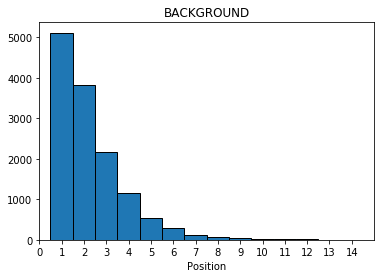

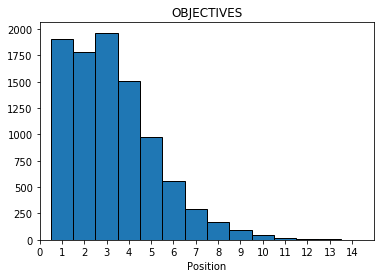

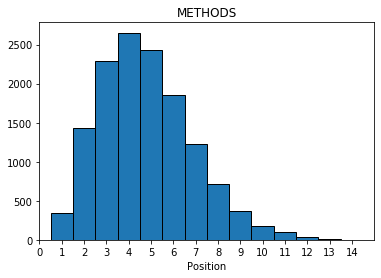

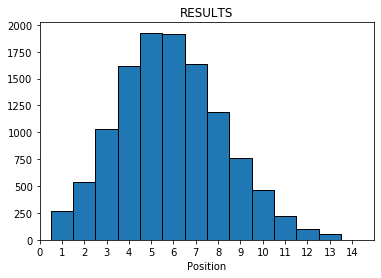

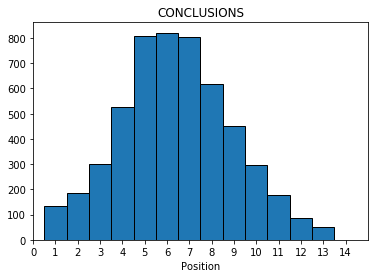

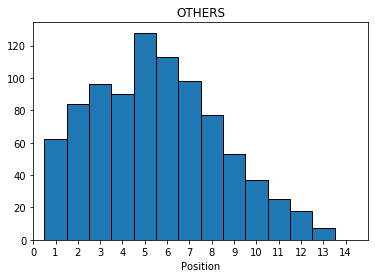

In [0]:
#%% plot  each label
#['BACKGROUND', 'OBJECTIVES', 'METHODS', 'RESULTS', 'CONCLUSIONS']
import matplotlib.pyplot as plt
LABEL = DATA.columns[2:8]

bins = np.arange(15) - 0.5
for index in range(6):
    plt.figure(index)
    plt.hist(DATA.loc[DATA[LABEL[index]]==1,'POSITION'], bins, ec='black')
    plt.xticks(range(15))
    plt.xlim([0, 15])
    plt.title(LABEL[index])
    plt.xlabel('Position')
    plt.show()

# More to try and investigate
* Lemmatization 
```
from nltk.stem import WordNetLemmatizer
```
* Different sentences preprocessing method
* For those empty sentences as well as length==1 sentences, should we just assign it to OTHERS or adjust the preprocessing procedure
